# ANISOTROPIC FILTERING: PERONA AND MALIK

We import the images_tools file with all the functions we have created: 

In [1]:
from images_tools import *

## Introduction

**Anisotropic filtering** is a **nonlinear diffusion method** (also called **Perona and Malik diffusion**) based on appliying adaptive smoothing techniques in order to **reduce noise but without removing significant information from the image, as they can be edges, lines or details.**

Unlike isotropic (linear) diffusion filtering which applys a standard Gaussian/mean filter that smooths the image by diffusing the gray values in all directions, anisotropic diffusion depends on local properties of the image applying an  aninhomogeneous process that reduces the diffusivity at those locations which have a larger likelihood to be edges.

This can be achieved thanks to the modifications Perona and Malik applied to the **diffusion coefficient** (already used in isotropic diffusion) which will depend on the gradient of the different parts of the image. In this way, **diffusion will be smaller (and so the smoothing) in areas with high gradient and diffusion will be greater in areas with low gradient.**

The main **advantage** of this algorithm, as it has been mentioned, is that it reduces noise in flat regions while preseving edges.

On the other hand, one of its **disadvantages** is that adjusting different parameters, such as the number of iterations can be a confusing task as it can degrade the fine structure reducing the resolution of the image.

During this notebook we are going to add both **Gaussian and Impulsive (Salt and Pepper) noise** to our original images with different intensities in order to observe the filtering imprevements we can achieve.

The noise can be increased or reduce thanks to the parameter *intensity* from the function *noisy_image*. When applying Gaussian noise what we are changing is the variance while when applying impulsive noise what we are changing is the amount.

In [2]:
img = mpimg.imread('ani_img.jpeg')

In [3]:
noisy_sp = noisy_image('ani_img.jpeg','s&p', 0.01, plot = False)

In [4]:
noisy_gaussian = noisy_image('ani_img.jpeg','gaussian', 0.01, plot = False)

## Simplified Perona and Malik filtering algorithm

- For Gaussian noise.

On the one hand, we are going to compare how the algorith works with Gaussian noise. 

In addition, to analyse its functioning from different perspectives we are going to use different noise intensities while applying the Perona and Malik filter with different iterations.

In [5]:
a = noisy_image('ani_img.jpeg','gaussian', 0.001, plot=False)
a1 = anisotropic(a, 1)
a2 = anisotropic(a, 3)

b = noisy_image('ani_img.jpeg','gaussian', 0.01, plot=False)
b1 = anisotropic(b, 1)
b2 = anisotropic(b, 3)

(Text(0.5, 1.0, 'Anisotropic Filtered (Niter=3)'), (-0.5, 1095.5, 847.5, -0.5))

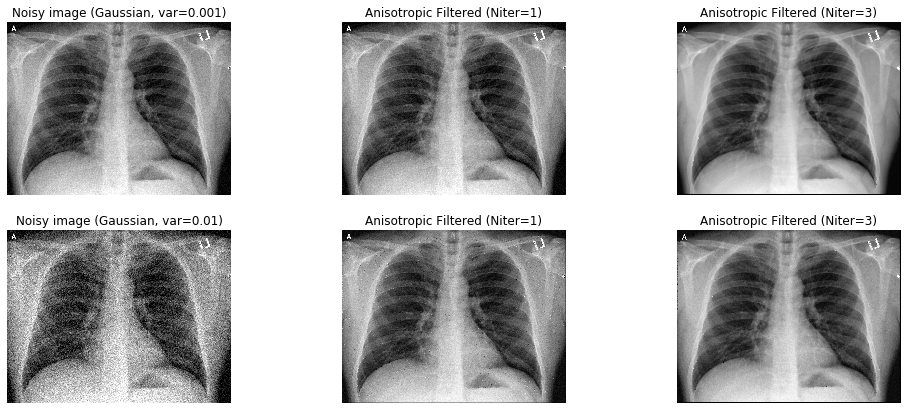

In [6]:
plt.figure(figsize=(17,7))
plt.subplot(2,3,1)
plt.imshow(a, cmap=plt.cm.gray)
plt.title('Noisy image (Gaussian, var=0.001)'), plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(a, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=1)'), plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(a2, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=3)'), plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(b, cmap=plt.cm.gray)
plt.title('Noisy image (Gaussian, var=0.01)'), plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(b1, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=1)'), plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(b2, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=3)'), plt.axis('off')

**Results**

The first row corresponds to the evolution of an image with Gaussian noise of **variance 0.001**. When applying one iteration filtering, we cannot observe much difference. However, three iterations are enough to eliminate most part of the noise while getting a good quality filtered image.

The second row corresponds to the evolution of the same image but with more Gaussian noise (**variance 0.01**). In this case, it is appreciable that one iteration removes great part of the noise but it is not enough. This is achieved with three iterations which results on a good filtered image (not as good as the first one as it has been exposed to more noise in the beggining). Trying with more iterations is not useful as it does not remove more noise but image quality is lowered.

- For impulsive noise.

Same procedure as with Gaussian noise is going to be followed; prove with different noise intensities and different iterations.

In [7]:
c = noisy_image('ani_img.jpeg','s&p', 0.001, plot=False)
c1 = anisotropic(c, 1)
c2 = anisotropic(c, 3)

d = noisy_image('ani_img.jpeg','s&p', 0.01, plot=False)
d1 = anisotropic(d, 1)
d2 = anisotropic(d, 5)

(Text(0.5, 1.0, 'Anisotropic Filtered (Niter=5)'), (-0.5, 1099.5, 851.5, -0.5))

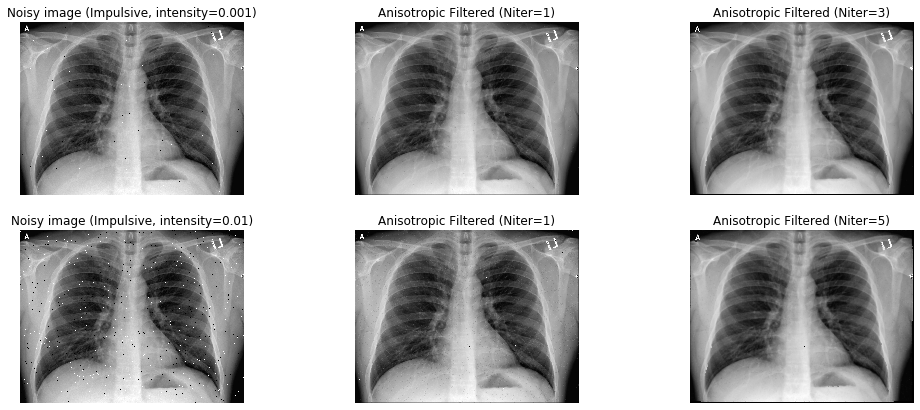

In [14]:
plt.figure(figsize=(17,7))
plt.subplot(2,3,1)
plt.imshow(c, cmap=plt.cm.gray)
plt.title('Noisy image (Impulsive, intensity=0.001)'), plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(c1, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=1)'), plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(c2, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=3)'), plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(d, cmap=plt.cm.gray)
plt.title('Noisy image (Impulsive, intensity=0.01)'), plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(d1, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=1)'), plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(d2, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=5)'), plt.axis('off')

**Results**

The first row corresponds to the evolution of an image with an **amount of 0.001** salt and pepper noise. As it is not much noise, one iteration is enough to achieve the complete removal of the noise. Then, we can appreciate that with three iterations we obtain the same results so it will be enough with one iteration.

The second row corresponds to the evolution of an image with a bigger **amount (0.01)** salt and pepper noise. One iteration seems not to be enough to have a complete clean image although it is clearly appreciable that it makes effect on it. In this case, five iterations is the number which gives us the better resulting image with almost no noise and good resolution.

## Conclusions

Finally, after analyzing how our algorithm responds to different types of noise with different intensities, let's observe if it reacts as it should be using the function *anisodiff*.

Furthermore, it will be also interesting to compare the effects of an anisotropic filter and an isotropic filter. To do this, we will use the function *meanfilter*.

In [16]:
# Comparations for Gaussian noise
b4 = anisodiff(b,niter=3, plot_flag= False)
b5 = meanfilter(noisy_gaussian, plot= False)

# Comparations for Salt and Pepper noise
d4 = anisodiff(d,niter=5, plot_flag= False)
d5 = meanfilter(noisy_sp, plot= False)

(Text(0.5, 1.0, 'Mean filter'), (-0.5, 1089.5, 841.5, -0.5))

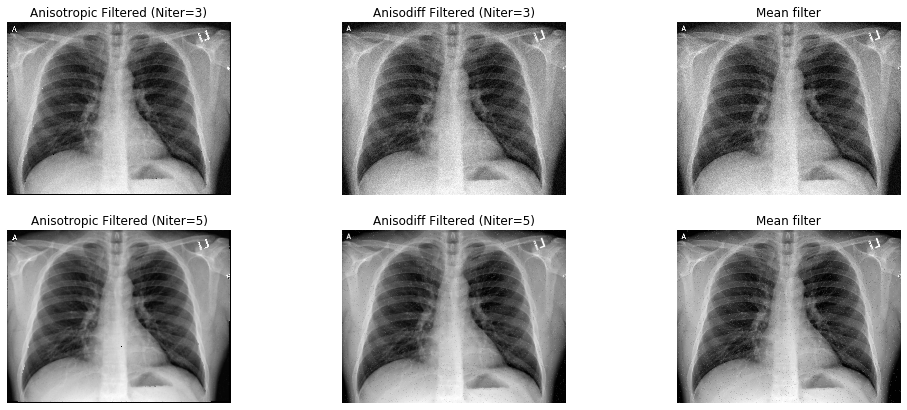

In [18]:
plt.figure(figsize=(17,7))

plt.subplot(2,3,1)
plt.imshow(b2, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=3)'), plt.axis('off')
plt.subplot(2,3,2)
plt.imshow(b4, cmap=plt.cm.gray)
plt.title('Anisodiff Filtered (Niter=3)'), plt.axis('off')
plt.subplot(2,3,3)
plt.imshow(b5, cmap=plt.cm.gray)
plt.title('Mean filter'), plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(d2, cmap=plt.cm.gray)
plt.title('Anisotropic Filtered (Niter=5)'), plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(d4, cmap=plt.cm.gray)
plt.title('Anisodiff Filtered (Niter=5)'), plt.axis('off')
plt.subplot(2,3,6)
plt.imshow(d5, cmap=plt.cm.gray)
plt.title('Mean filter'), plt.axis('off')

**Results**

The first row corresponds to how the different algorithms respond to **Guassian noise**. Therefore, we can say that the results between our algorithm and what it is expected are very similar as it can be observed in the first two images, actually it seems that the final result with our algorithm has a better quality and less noise. On the other hand, when comparing with the mean filter we cannot appreciate so much difference, it is unclear if the edges remains the same, but this is caused by our original image as it initially does not have very differentiative edges.

In the second row, similar results are obtained with the **Salt and Pepper noise**. The effects between our algorithm and the one of the function *anisodiff* are very alike, although if we zoom in on them, it is appreciable that our algorithm left less noise than *anisodiff*. Then, when comparing these results to the ones of the mean filter we get to the same conclusion as before, as our original image does not have very remarkable edges, there is no much difference between the isotropic and anisotropic diffusion.

### References


Chapter 3.

https://www.lpi.tel.uva.es/muitic/pim/docus/anisotropic_diffusion.pdf

https://www.researchgate.net/publication/220203882_A_diffusion_method_for_image_filtering_and_sharpening

https://en.wikipedia.org/wiki/Anisotropic_diffusion

### Contribution

On the one hand, Lucía and Sandra made the code and the explanations for the algorithm and Sofía made the notebook. However, we have done periodic meeetings in order to help each other and check if everything was alright.